In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Hp i5\Desktop\Task Data\insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Check for null values
print(df.isnull().sum())

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].astype('category').cat.codes


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


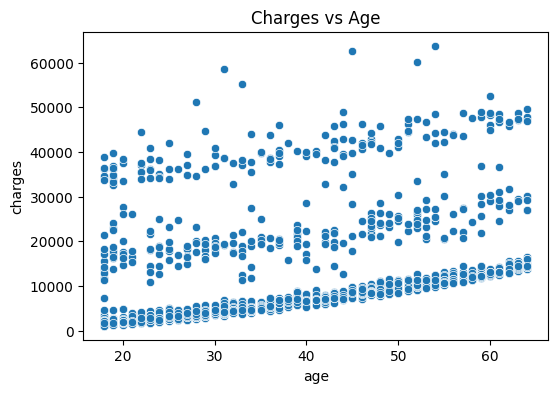

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Charges vs Age')
plt.show()


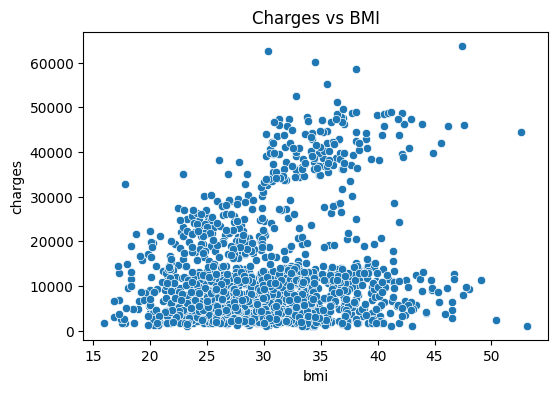

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Charges vs BMI')
plt.show()


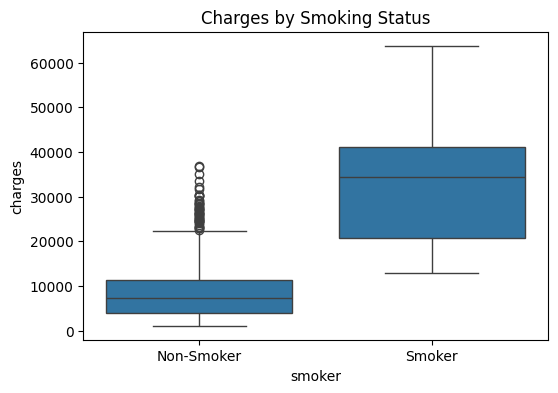

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()


In [8]:
# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [9]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 4186.51
RMSE: 5799.59


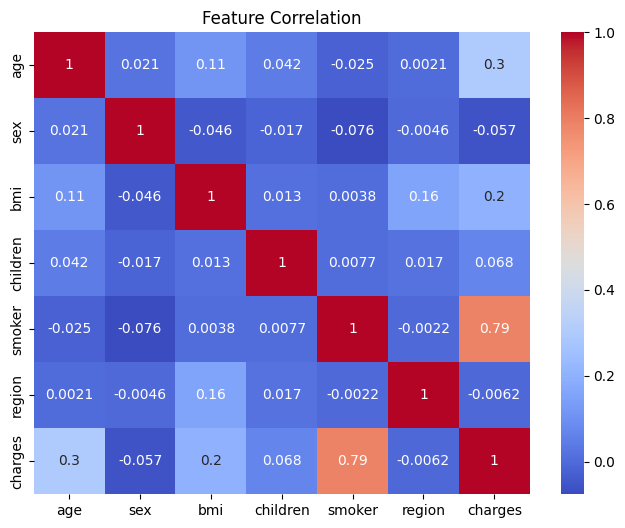

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()
